<a href="https://colab.research.google.com/github/caxaxa/Chacha_PhD_Projects/blob/master/Incentive_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def get_ICs(alphas):
    n = 1000
    x = np.arange(0, 1,1/n )

    #Ploting Indiference curves

    fig, ax = plt.subplots(figsize = (5,4))

    ax.plot(x, alphas, linewidth=2)

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.92, 0.05, '$𝛽$')
    fig.text(0.11, 0.9, '$𝛼$')

    ax.fill_between(x, alphas, facecolor='salmon', alpha=0.1)

    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('Incentive Constraint','Corruption Zone' ),loc='best', shadow=False)
    #plt.grid(True)
    # fig.text(0.18, 0.2, 'Corruption')
    # fig.text(0.5, 0.4, 'No Corruption')
    plt.savefig('./fig1.pdf')
    plt.show()

In [87]:
def get_b_star(gamma,alpha,beta,c,a):
  return (((gamma**2)*((1-alpha*beta)*a-alpha*beta*f)) + ((gamma**2*alpha*beta*f + c)/((gamma**2)*(1-alpha*beta))))/2

def get_y_payer(gamma,alpha,beta,f,b):
  return -b +(gamma**2)*((1-alpha*beta)*a - alpha*beta*f)

def get_y_receiver(gamma,alpha,beta,f,b,c):
  return -c +(gamma**2)*((1-alpha*beta)*b - alpha*beta*f)



In [88]:
a = 5
f = 5
c = 1

gamma = .9



In [89]:
#Fixed point solution
# Numerical Solution
def alpha_solver(n):
  alphas = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while get_y_receiver(gamma,alpha,beta,f,get_b_star(gamma,alpha,beta,c,a),c)>0:
      alpha += 1/n
      if alpha>1.01:
        break
    alphas[i] = alpha -1/n
  return alphas

alphas = alpha_solver(1000)

In [90]:
#CHeck if the result is the same for the receiver
# #Fixed point solution
# # Numerical Solution
# alphas = np.zeros(100)
# for i in range(0,100,1):
#   beta = i/100 
#   α = 0
#   while get_y_payer(gamma,α,beta,f,get_b_star(gamma,α,beta,c,a))>0:
#     α += .01
#     if α>1.02:
#       break
#   alphas[i] = α -0.01
  

# alphas

In [91]:
def P_payer_solver(n,P_star):
  P_p = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while gamma*((1-beta)*get_b_star(gamma,alpha,beta,c,a)-beta*f)/f < -P_star:
      alpha += 1/n
      if alpha>1.01:
        break
    P_p[i] = alpha -1/n
  return P_p

In [92]:
def R_payer_solver(n,R_star):
  R_p = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while ((1-alpha*beta)*get_b_star(gamma,alpha,beta,c,a)-alpha*beta*f)/f  >  -R_star:
      alpha += 1/n
      if alpha > 1.01:
        break
    R_p[i] = alpha - 1/n
  return R_p
R_payer_solver(200,-0.3)

array([1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005,
       1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005,
       1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005,
       1.005, 1.005, 0.985, 0.95 , 0.92 , 0.89 , 0.865, 0.84 , 0.815,
       0.79 , 0.77 , 0.75 , 0.73 , 0.71 , 0.695, 0.68 , 0.66 , 0.645,
       0.63 , 0.62 , 0.605, 0.595, 0.58 , 0.57 , 0.56 , 0.545, 0.535,
       0.525, 0.515, 0.51 , 0.5  , 0.49 , 0.48 , 0.475, 0.465, 0.46 ,
       0.45 , 0.445, 0.435, 0.43 , 0.425, 0.42 , 0.41 , 0.405, 0.4  ,
       0.395, 0.39 , 0.385, 0.38 , 0.375, 0.37 , 0.365, 0.36 , 0.355,
       0.35 , 0.345, 0.34 , 0.34 , 0.335, 0.33 , 0.325, 0.32 , 0.32 ,
       0.315, 0.31 , 0.31 , 0.305, 0.3  , 0.3  , 0.295, 0.29 , 0.29 ,
       0.285, 0.285, 0.28 , 0.28 , 0.275, 0.27 , 0.27 , 0.265, 0.265,
       0.26 , 0.26 , 0.255, 0.255, 0.255, 0.25 , 0.25 , 0.245, 0.245,
       0.24 , 0.24 , 0.24 , 0.235, 0.235, 0.23 , 0.23 , 0.23 , 0.225,
       0.225, 0.22 ,

In [93]:
def get_IC_star(n,R_star,P_star,show_arrow = False):
    x = np.arange(0.0000001, 1,1/n )
    N = 0.5


    alphas = alpha_solver(n)

    #Ploting Indiference curves

    P_p = P_payer_solver(n,P_star)
    R_p = R_payer_solver(n,R_star)

    R_r = np.zeros(n)
    for  i in range(n):
      R_r[i]=((((R_star*f)/(gamma**2))+a)/(((i+0.01)/n)*(a+f))) #

    P_r =  ((((P_star*(f))/gamma)+(a))/(a+f))
    

    fig, ax = plt.subplots(figsize = (7,4))

    ax.plot(x, alphas, linewidth=2)
    ax.plot(x,R_p,'-.',linewidth=.5 )
    ax.plot(x,R_r,linewidth=.5 )
    ax.plot(x,P_p,'--',color='blue',linewidth=.5 )
    ax.axvline(P_r, color= 'green', linewidth = .8)

    # ax.plot(P, x ,linewidth=.5 )

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.58, 0.05, '$𝛽$')
    fig.text(0.025, 0.9, '$𝛼$')
    #fig.text(0.65, 0.08, '$𝛽~(P*) $')
    #fig.text(0.02, 0.485, '$𝛼~(R*)$')

    
    lim = int(700) 

    ax.fill_between(x[0:lim], alphas[0:lim], facecolor='salmon', alpha=0.1)
    ax.fill_between(x, alphas , R_p ,facecolor='white', alpha=1,label='_nolegend_')
    ax.fill_between(x, alphas, R_p, facecolor='yellow', alpha=0.1)
    #ax.fill_between(P_p, x, facecolor='yellow', alpha=0.1)
    ax.fill_between(x[lim: n], R_p[lim : n], facecolor='green', alpha=0.1)

    if show_arrow == True:
      ax.arrow(0.6, 0.17,- 0.05,- 0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.6, 0.17, 0.05, 0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.415, 0.415, -0.05,  -0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.405, 0.435, -0.05, -0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.415, 0.695,- 0.05,- 0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.405, 0.715, -0.05, -0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.7, 0.1,- 0.05,0, head_width=0.02, head_length=0.02 )
      ax.arrow(0.7, 0.1, 0.05, 0, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.415, 0.695,- 0.05,- 0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.405, 0.715, -0.05, -0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.78, 0.92, -0.05,  0, head_width=0.02, head_length=0.02 )
      ax.arrow(0.78, 0.95, -0.05,  0, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)


    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('Incentive Constraint','$R_{payer}^*$','$R_{receiver}^*$','$P_{payer}^*$','$P_{receiver}^*$','Self-Reporting','Plea Bragaining'),bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    if show_arrow == True:
      plt.savefig('./fig3.pdf')
    else:
      plt.savefig('./fig2.pdf')
    plt.show()

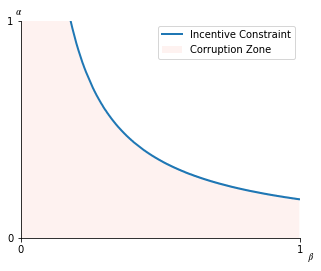

In [98]:
get_ICs(alphas)

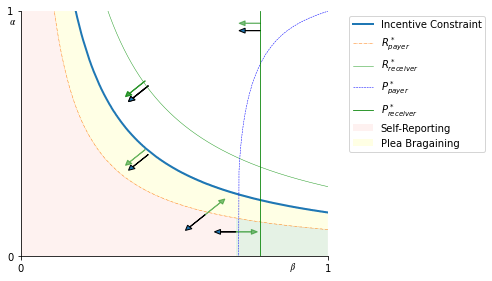

In [94]:
get_IC_star(1000,-.35,.5,show_arrow=True)

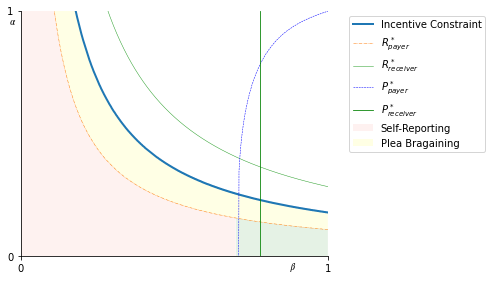

In [95]:
get_IC_star(1000,-.35,.5)